In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [2]:
df1 = pd.read_csv("heroes_information.csv")
df2 = pd.read_csv("super_hero_powers.csv")

In [3]:
df2['Powers'] = df2.sum(axis=1)

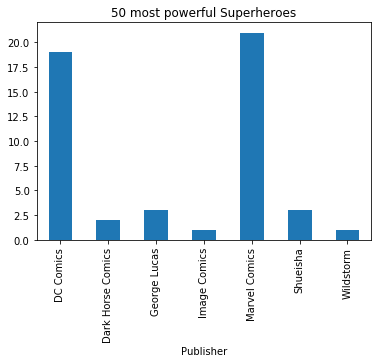

In [4]:
heroes_df = df2[['hero_names','Powers']]
merged_heroes_with_universe = pd.merge(heroes_df, df1, left_on='hero_names', right_on='name')
merged_heroes_with_universe = merged_heroes_with_universe.sort_values(by=[('Powers')], ascending=False)
merged_heroes_with_universe = merged_heroes_with_universe.head(50)
merged_heroes_with_universe = merged_heroes_with_universe.groupby('Publisher').agg({'name':['count']})
ax = merged_heroes_with_universe.plot(kind='bar', title="50 most powerful Superheroes");
ax.legend().set_visible(False);


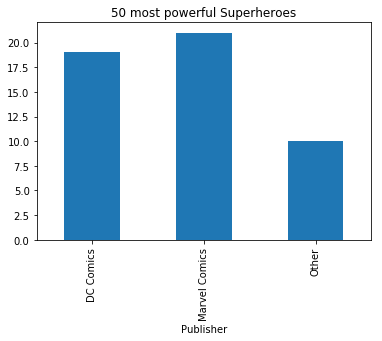

In [5]:
universe = df1[['name','Publisher']]
merged_heroes = pd.merge(universe, df2, left_on='name', right_on='hero_names')
DC_comics = merged_heroes[merged_heroes['Publisher'] == 'DC Comics']
Marvel_comics = merged_heroes[merged_heroes['Publisher'] == 'Marvel Comics']
Other_comics = merged_heroes[(merged_heroes['Publisher'] != 'Marvel Comics') & (merged_heroes['Publisher'] != 'DC Comics')]
Other_comics[:]['Publisher'] = 'Other'
# Refined Dataframe
Merged_df = pd.concat([DC_comics, Marvel_comics, Other_comics])
Merged_df_sort = Merged_df.sort_values(by=[('Powers')], ascending=False)
Merged_df_sort = Merged_df_sort.head(50)
Merged_df_sort = Merged_df_sort.groupby('Publisher').agg({'name':['count']})
ax = Merged_df_sort.plot(kind='bar', title="50 most powerful Superheroes");
ax.legend().set_visible(False);


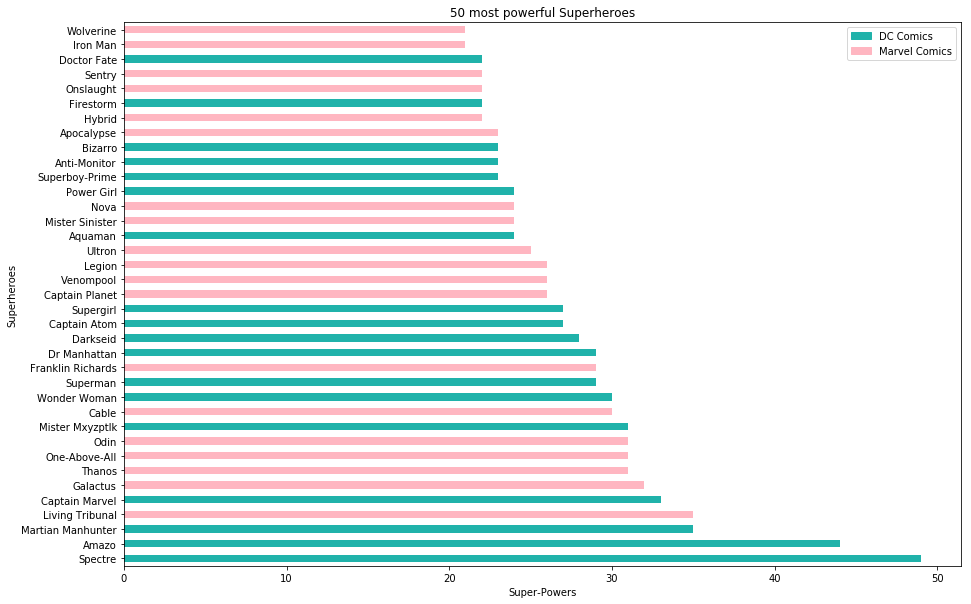

In [6]:
import matplotlib.patches as mpatches
merged_df_sorted = Merged_df.sort_values(by=[('Powers')], ascending=False)
merged_df_sorted = merged_df_sorted.head(50)
merged_df_sorted.head()
merged_df_sorted = merged_df_sorted[(merged_df_sorted.Publisher == 'Marvel Comics') | (merged_df_sorted.Publisher == 'DC Comics')]
merged_df_sorted = merged_df_sorted.drop_duplicates(subset='name', keep="last")
heroes = merged_df_sorted.hero_names
ax = merged_df_sorted.plot.barh(figsize=(15, 10), color = [np.where(merged_df_sorted["Publisher"]=='DC Comics', 'lightseagreen', 'lightpink')] )
ax.set_yticklabels(heroes);
red_patch = mpatches.Patch(color='lightseagreen', label='DC Comics')
green_patch = mpatches.Patch(color='lightpink', label='Marvel Comics')
ax.legend(handles=[red_patch, green_patch]);
ax.set_ylabel("Superheroes");
ax.set_xlabel("Super-Powers");
ax.set_title('50 most powerful Superheroes');

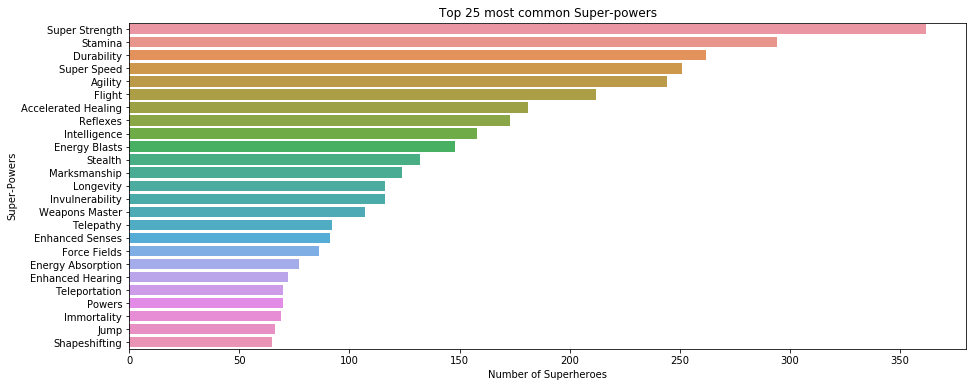

In [7]:
from collections import Counter
# Most common super powers
count_dict = dict(Merged_df.apply(Counter, axis=0))
columns = list(Merged_df.columns.values)
df_count = pd.DataFrame(columns=['Super_power', 'count'])
for c in columns:
    df_count = df_count.append({'Super_power': c, 'count': count_dict[c][True]}, 
                           ignore_index=True)
df_count = df_count.sort_values(by=[('count')], ascending=False)
df_count = df_count.head(25)
powers = df_count.Super_power.unique()
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
ax.set_title('Top 25 most common Super-powers')
ax.set_xlabel('Power')
ax = sns.barplot(df_count['count'], powers)
ax.set_xlabel("Number of Superheroes")
ax.set_ylabel("Super-Powers")
cols_of_interest = df_count['Super_power'].tolist()

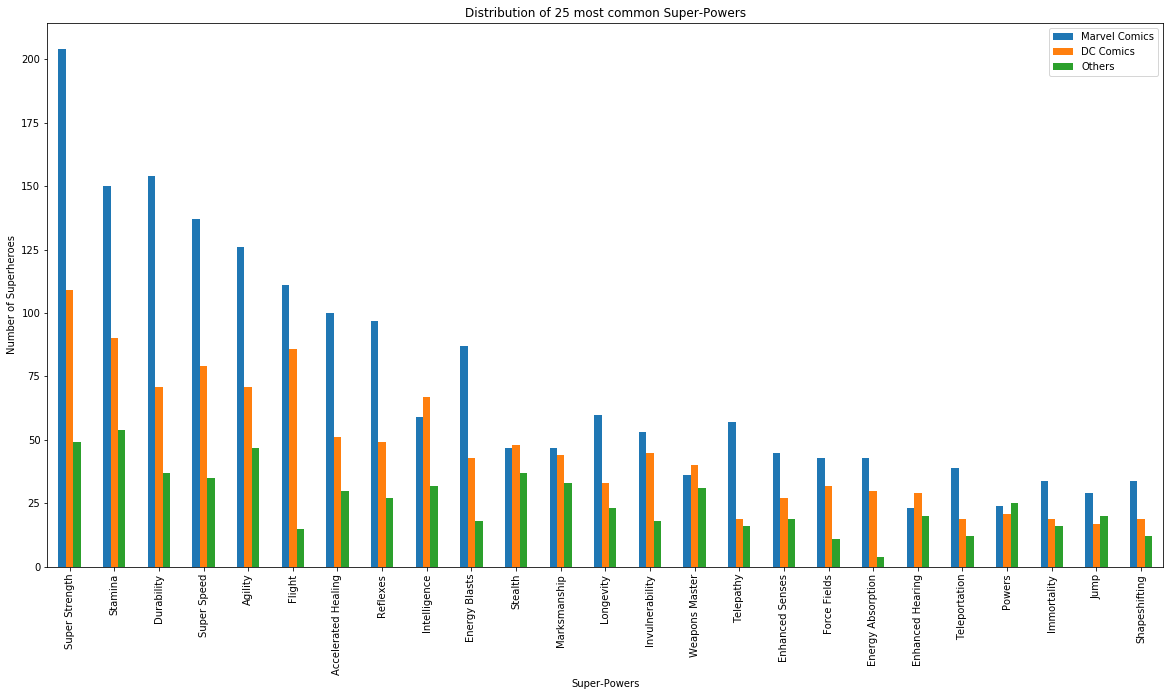

In [8]:
marvel = Merged_df[Merged_df['Publisher'] == 'Marvel Comics']
dc = Merged_df[Merged_df['Publisher'] == 'DC Comics']
other = Merged_df[Merged_df['Publisher'] == 'Other']
marvel_imp = marvel[cols_of_interest]
dc_imp = dc[cols_of_interest]
other_imp = other[cols_of_interest]

count_dict = dict(marvel_imp.apply(Counter, axis=0))
columns = list(marvel_imp.columns.values)
Marvel_count = pd.DataFrame(columns=['Super_power', 'Marvel_count'])
for c in columns:
    Marvel_count = Marvel_count.append({'Super_power': c, 'Marvel_count': count_dict[c][True]}, 
                           ignore_index=True)

count_dict = dict(dc_imp.apply(Counter, axis=0))
columns = list(dc_imp.columns.values)
DC_count = pd.DataFrame(columns=['Super_power', 'DC_count'])
for c in columns:
    DC_count = DC_count.append({'Super_power': c, 'DC_count': count_dict[c][True]}, 
                           ignore_index=True)

count_dict = dict(other_imp.apply(Counter, axis=0))
columns = list(other_imp.columns.values)
Other_count = pd.DataFrame(columns=['Super_power', 'Other_count'])
for c in columns:
    Other_count = Other_count.append({'Super_power': c, 'Other_count': count_dict[c][True]}, 
                           ignore_index=True)

merged_powers = pd.merge(Marvel_count, DC_count, on='Super_power')
merged_powers = pd.merge(merged_powers, Other_count, on='Super_power')
ax = merged_powers.plot(kind='bar', title="Distribution of 25 most common Super-Powers", figsize=(20,10), rot=90);
ax.set_xticklabels(merged_powers.Super_power)
ax.set_ylabel("Number of Superheroes")
ax.set_xlabel("Super-Powers")
ax.legend(["Marvel Comics","DC Comics","Others"]);

In [9]:
# Alignment comparison
DC_comics = df1[df1['Publisher'] == 'DC Comics']
Marvel_comics = df1[df1['Publisher'] == 'Marvel Comics']
Other_comics = df1[(df1['Publisher'] != 'Marvel Comics') & (df1['Publisher'] != 'DC Comics')]
Other_comics[:]['Publisher'] = 'Other'
# Refined Dataframe
Refined_df = pd.concat([DC_comics, Marvel_comics, Other_comics])
male = []
female = []
#Marvel
count_marvel_good_male = Refined_df[(Refined_df['Publisher'] == 'Marvel Comics') & 
                                    (Refined_df['Gender'] == 'Male') & 
                                    (Refined_df['Alignment'] == 'good')].shape[0]
count_marvel_good_female = Refined_df[(Refined_df['Publisher'] == 'Marvel Comics') & 
                                    (Refined_df['Gender'] == 'Female') & 
                                    (Refined_df['Alignment'] == 'good')].shape[0]
count_marvel_male = Refined_df[(Refined_df['Publisher'] == 'Marvel Comics') & 
                                    (Refined_df['Gender'] == 'Male')].shape[0]
count_marvel_female = Refined_df[(Refined_df['Publisher'] == 'Marvel Comics') & 
                                    (Refined_df['Gender'] == 'Female')].shape[0]
percent_marvel_male_good = (count_marvel_good_male/count_marvel_male)*100
percent_marvel_female_good = (count_marvel_good_female/count_marvel_female)*100
male.append(percent_marvel_male_good)
female.append(percent_marvel_female_good)
# DC
count_dc_good_male = Refined_df[(Refined_df['Publisher'] == 'DC Comics') & 
                                    (Refined_df['Gender'] == 'Male') & 
                                    (Refined_df['Alignment'] == 'good')].shape[0]
count_dc_good_female = Refined_df[(Refined_df['Publisher'] == 'DC Comics') & 
                                    (Refined_df['Gender'] == 'Female') & 
                                    (Refined_df['Alignment'] == 'good')].shape[0]
count_dc_male = Refined_df[(Refined_df['Publisher'] == 'DC Comics') & 
                                    (Refined_df['Gender'] == 'Male')].shape[0]
count_dc_female = Refined_df[(Refined_df['Publisher'] == 'DC Comics') & 
                                    (Refined_df['Gender'] == 'Female')].shape[0]
percent_dc_male_good = (count_dc_good_male/count_dc_male)*100
percent_dc_female_good = (count_dc_good_female/count_dc_female)*100
male.append(percent_dc_male_good)
female.append(percent_dc_female_good)

# Others
count_other_good_male = Refined_df[(Refined_df['Publisher'] == 'Other') & 
                                    (Refined_df['Gender'] == 'Male') & 
                                    (Refined_df['Alignment'] == 'good')].shape[0]
count_other_good_female = Refined_df[(Refined_df['Publisher'] == 'Other') & 
                                    (Refined_df['Gender'] == 'Female') & 
                                    (Refined_df['Alignment'] == 'good')].shape[0]
count_other_male = Refined_df[(Refined_df['Publisher'] == 'Other') & 
                                    (Refined_df['Gender'] == 'Male')].shape[0]
count_other_female = Refined_df[(Refined_df['Publisher'] == 'Other') & 
                                    (Refined_df['Gender'] == 'Female')].shape[0]
percent_other_male_good = (count_other_good_male/count_other_male)*100
percent_other_female_good = (count_other_good_female/count_other_female)*100
male.append(percent_other_male_good)
female.append(percent_other_female_good)

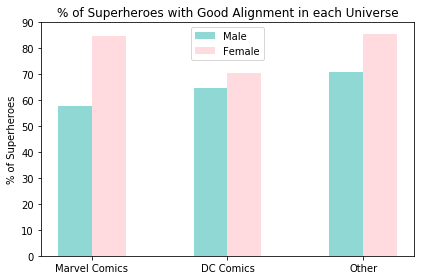

In [10]:
n_groups = 3
fig, ax = plt.subplots()
Publishers = ["Marvel Comics","DC Comics","Other"]
index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.5
rects1 = ax.bar(index, male, bar_width,
                alpha=opacity, color='lightseagreen',
                label='Male')

rects2 = ax.bar(index + bar_width, female, bar_width,
                alpha=opacity, color='lightpink',
                label='Female')

ax.set_ylabel('% of Superheroes')
ax.set_title('% of Superheroes with Good Alignment in each Universe')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(Publishers)
ax.legend()

fig.tight_layout()
plt.show()